# CSE 5243: Introduction to Data Mining
## Lab 4: Cluster Analysis 
### Xueyin Yin
### Allen Yang

### 10/28/2018


## 0. Get the data 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df0 = pd.read_csv('seeds.csv',header = 0)
df = df0.drop(['variety'],axis=1)
df

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533


## 1. Preliminary data analysis (15 points) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area             210 non-null float64
perimeter        210 non-null float64
compactness      210 non-null float64
kernel_length    210 non-null float64
kernel_width     210 non-null float64
asym             210 non-null float64
groove_length    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


#### First of all, from the information of the data set, we can note that there are no missing values in this data set.

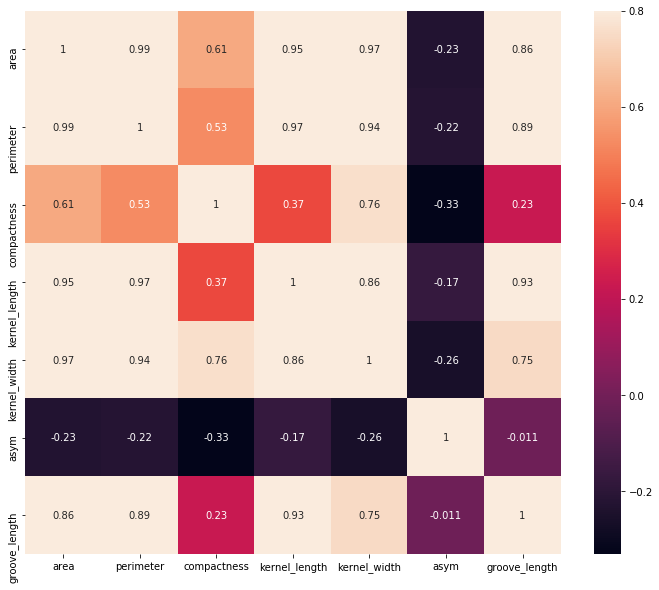

In [6]:
plt.figure(figsize=(12,10))
corr = sns.heatmap(df.corr(),vmax=0.8,annot = True)

#### To analysis attribute correlations in the data set. We plot a heatmap. From this map, perimeter is closely related to all the other attributes except for asym. In addition, groove_length also has close correlation with other attributes, except for asym. Therefore, in the following pre-processing, we are going to drop the two attributes. Moreover, asym does not have any close correlation with other attributes.

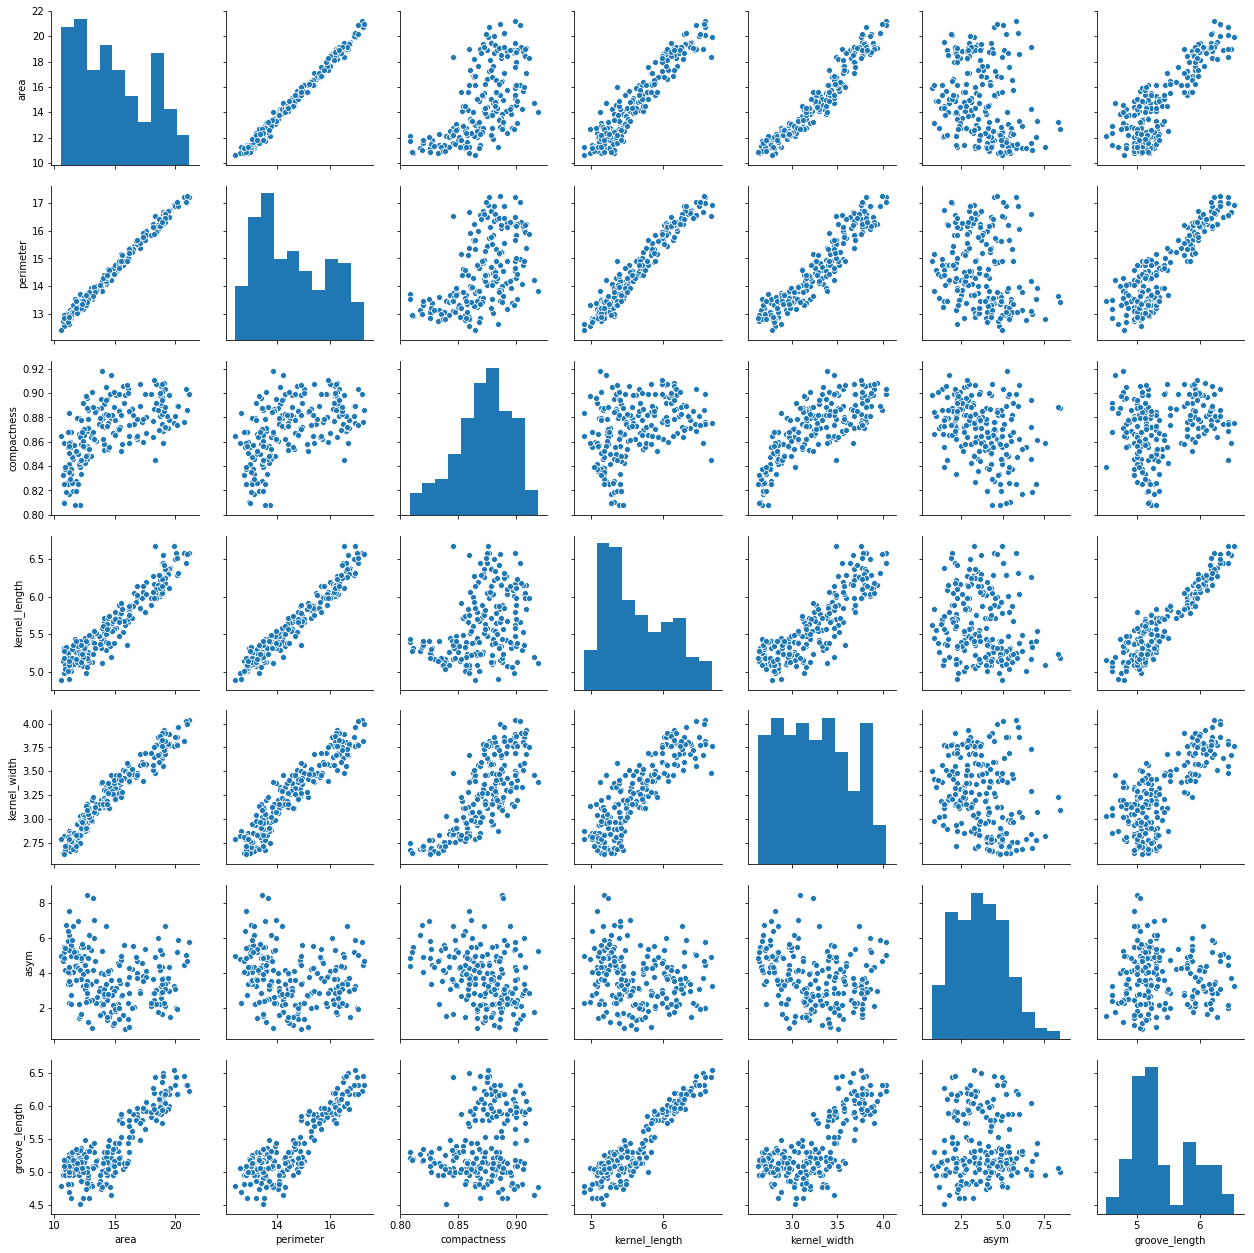

In [7]:
sns.pairplot(df, kind="scatter", palette="Set2")

#### Here, we use the pairplot method to visualize the correlation between different attributes. As we can see, area has a linear relationship with parameter, kernel_length, kernel_width, and groove_length. Also, we can observe some other liner relationship between other attributes. This means there is some redundant information in the data set. We can use feature selection and some other techniques to reduce them.

## 2. Data preprocessing (5 points)

#### According to the reliminary data analysis, we found that this dataset has too many dimensions to visualize. In addition, we found some attributes such as perimeter and groove_length have high correlation with others. Thus, we use feature subset selection to drop some similiar attributes and implement PCA to reduce the dimensionality of the data. At the same time, we standardize the data in order to avoid some attributes with high value dominate the whole data.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df
X_scaler = StandardScaler()
#Subset Selection
X.drop(['perimeter'],axis = 1)
X.drop(['groove_length'],axis = 1)

X = X_scaler.fit_transform(X)
# PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[ 3.17047052e-01,  7.83669015e-01],
       [-3.38617773e-03,  1.91321367e+00],
       [-4.59443341e-01,  1.90722525e+00],
       [-5.91935651e-01,  1.93106922e+00],
       [ 1.10291005e+00,  2.06809003e+00],
       [-3.36815150e-01,  1.63691626e+00],
       [-1.45602498e-01,  4.36414570e-01],
       [-4.25439933e-01,  1.39015330e+00],
       [ 1.76718434e+00,  3.07528830e-01],
       [ 1.44119415e+00,  1.01106830e+00],
       [ 6.71107449e-02, -4.29312461e-01],
       [-5.72683493e-01,  1.55824408e+00],
       [-9.31414541e-01,  8.73925640e-01],
       [-9.14882766e-01,  8.71940034e-01],
       [-1.00836149e+00,  9.58530316e-01],
       [-5.15522337e-01,  1.05872649e+00],
       [-7.84530515e-01,  1.14197655e+00],
       [ 6.79029059e-01,  2.17036180e+00],
       [-2.34416607e-01,  2.78779387e+00],
       [-1.73767215e+00,  3.40140568e-01],
       [-5.61482567e-01,  1.58659628e-01],
       [-4.77524312e-01,  7.04746626e-01],
       [ 8.57383186e-01,  2.32117455e+00],
       [-1.

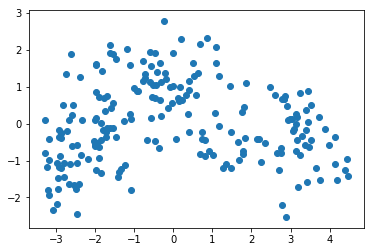

In [9]:
plt.scatter(X[:,0],X[:,1])

## 3. Find “natural” clusters (70 points)

### K-means

#### Cohesion and Separation

#### For K-means method, we initialized it with different number of clusters, and calculated their corresponding SSE and SSB. 

SSE is 497.84929589195013
SSB is 810.1932510262641


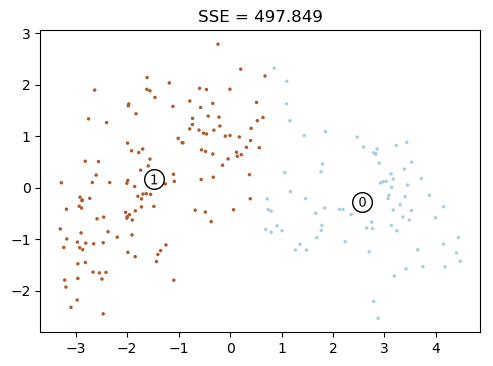

SSE is 270.4896708173141
SSB is 1037.5528761009


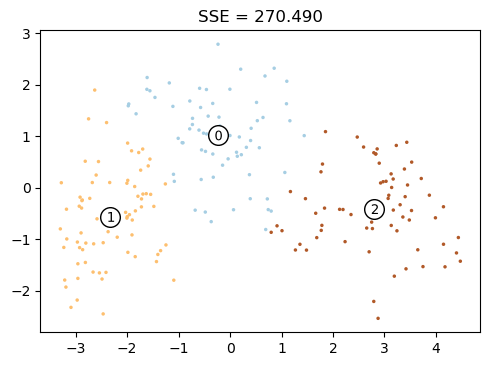

SSE is 211.20726701192447
SSB is 1096.8352799062898


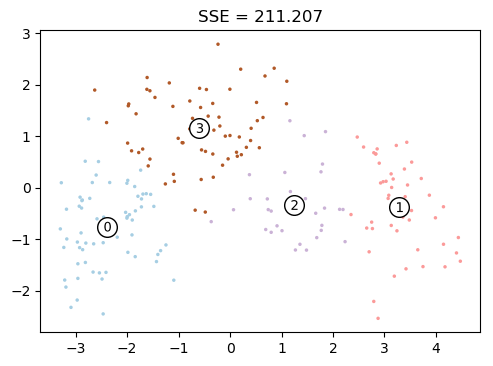

SSE is 167.7626351325025
SSB is 1140.2799117857119


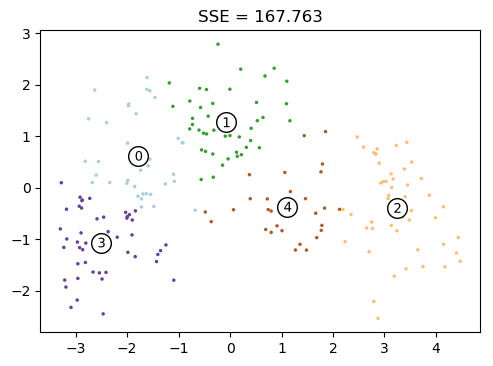

SSE is 143.36902947288257
SSB is 1164.6735174453318


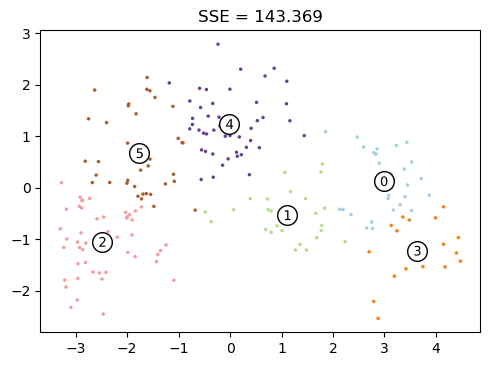

SSE is 119.65394886063415
SSB is 1188.38859805758


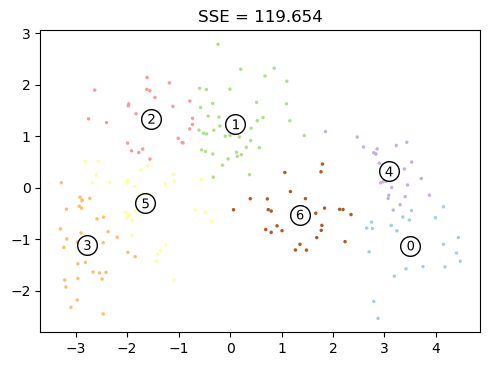

SSE is 106.35193002356695
SSB is 1201.6906168946475


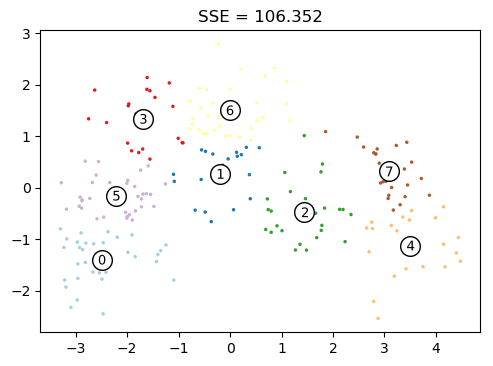

SSE is 90.3531372635916
SSB is 1217.6894096546228


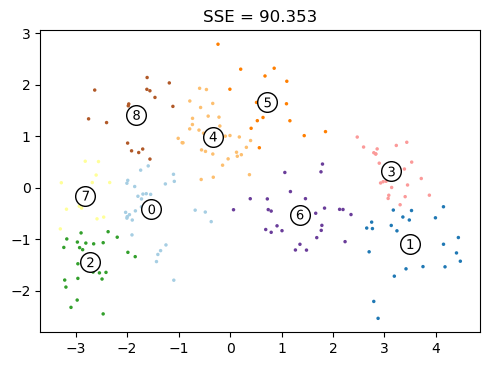

SSE is 83.1412331566651
SSB is 1224.9013137615489


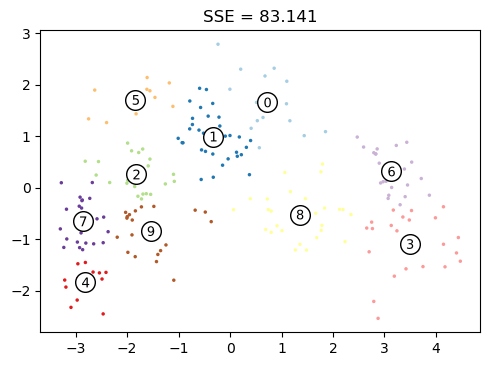

In [8]:
X_ = 0
Y_ = 0
size = 0
for d in X:
    X_ = X_ + d[0]
    Y_ = Y_ + d[1]
    size += 1 
cx = X_/size
cy = Y_/size


from sklearn.cluster import KMeans
SSE_Set = [];
for n in range(2,11):
    Size_Set = []
    for i in range(0,n+1):
        Size_Set.append(0)

    kmeans = KMeans(init='random', n_clusters=n)
    y = kmeans.fit_predict(X)
    SSE = kmeans.inertia_
    centers = kmeans.cluster_centers_
    SSE_Set.append(SSE)
    
    # Plot 'em
    fig = plt.figure(figsize=(8, 4), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y, cmap='Paired')
    #ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
    ax.set_title('SSE = {:.3f}'.format(kmeans.inertia_))
    
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for p in kmeans.labels_:
        for cls in range(0,n+1):
            if p == cls:
                Size_Set[cls]+=1
    k = 0
    SSB = 0
    for center in centers:
        SSB += Size_Set[k]*np.square(center[0]-cx) + Size_Set[k]*np.square(center[1]-cy)
        k += 1
    print('SSE is',SSE)
    print('SSB is',SSB)
    # Label the cluster centers
    for i, c in enumerate(centers):
        cl = '${}$'.format(i)
        ax.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

    plt.show()

#### Elbow Method

#### To choose the best value of k, elbow method is implemented to find a balance between SSE and k. Here, we choose k as 3.

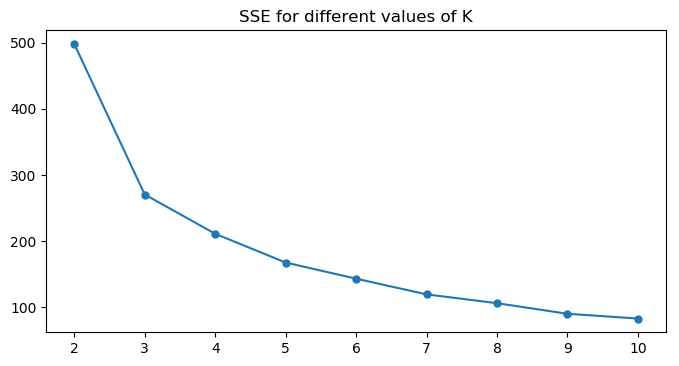

In [9]:
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(list(range(2,11)), SSE_Set, marker='.', markersize=10)
ax.set_title('SSE for different values of K')
plt.show()

#### Silhouette Score

#### To evaluate the model, we use silhouette score method. As we can observe, when k=3, it yields flatter silhouettes, and the shape is more similar between each other. So we choose k=3 as the number of clusters.

For K = 2, the average silhouette score is 0.530


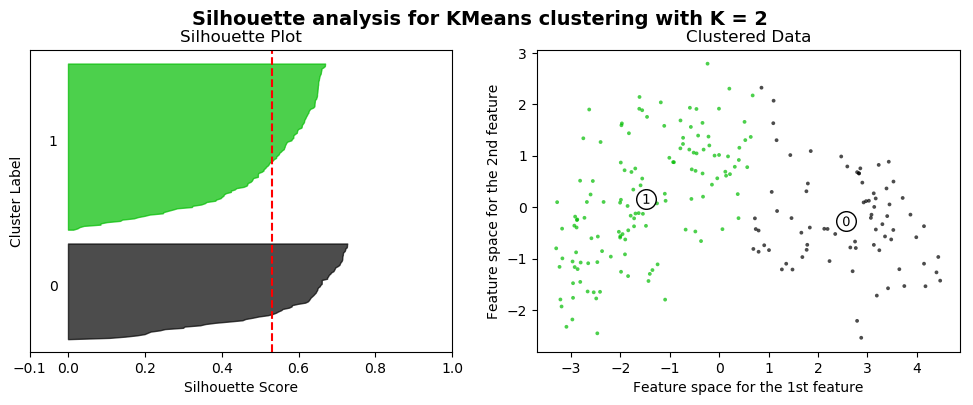

For K = 3, the average silhouette score is 0.493


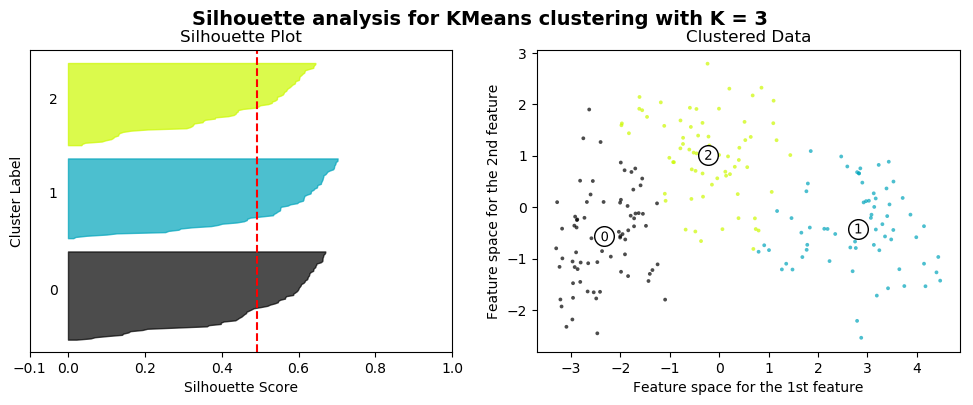

For K = 4, the average silhouette score is 0.442


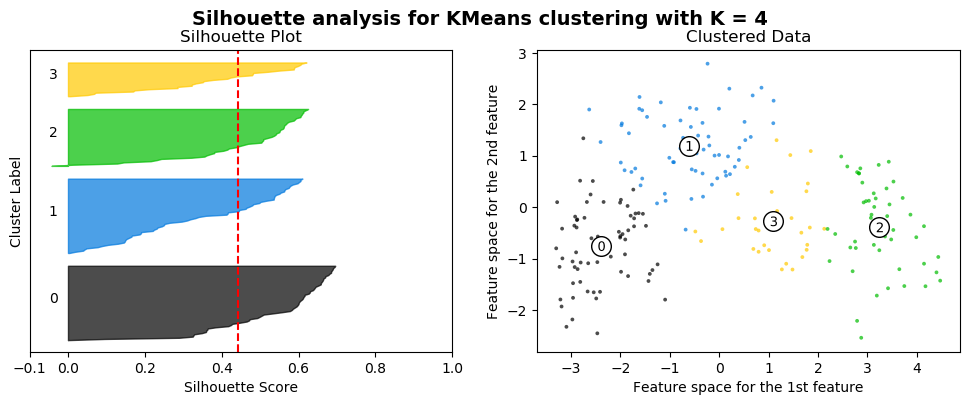

For K = 5, the average silhouette score is 0.401


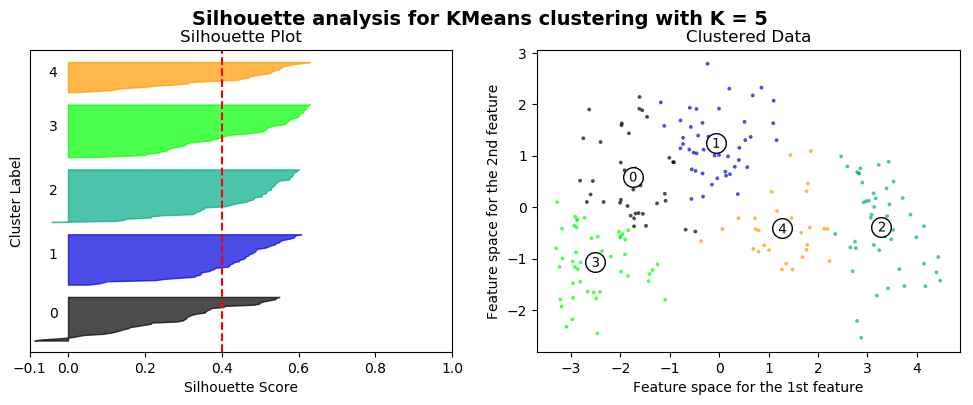

For K = 6, the average silhouette score is 0.390


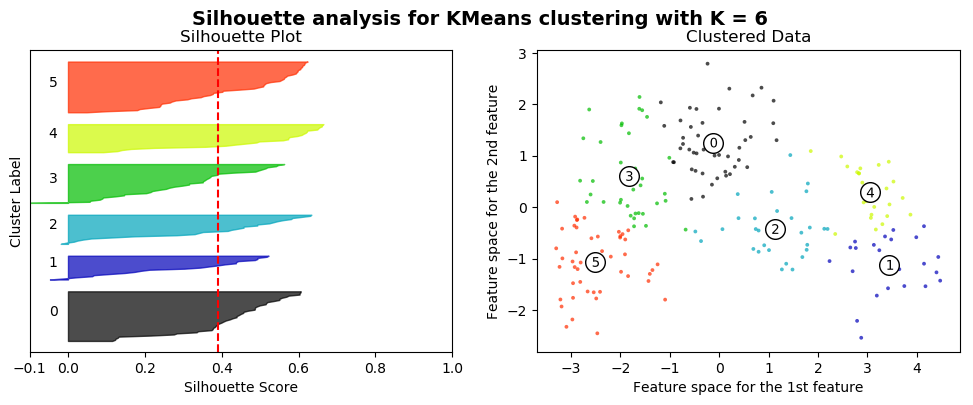

For K = 7, the average silhouette score is 0.371


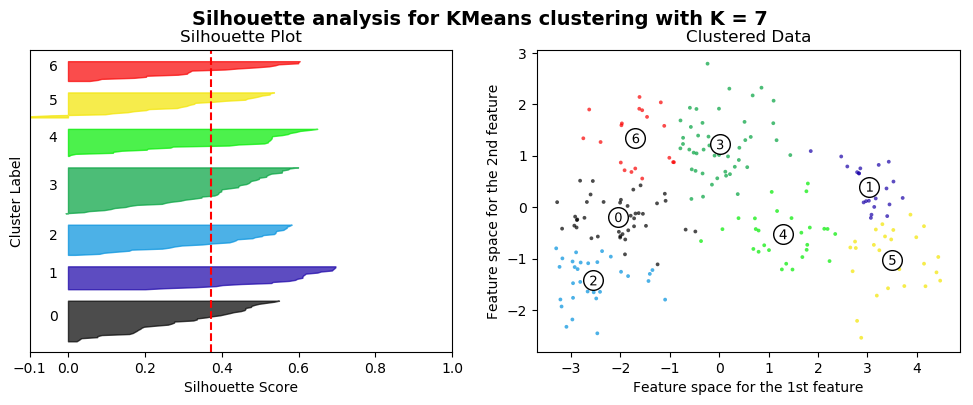

For K = 8, the average silhouette score is 0.391


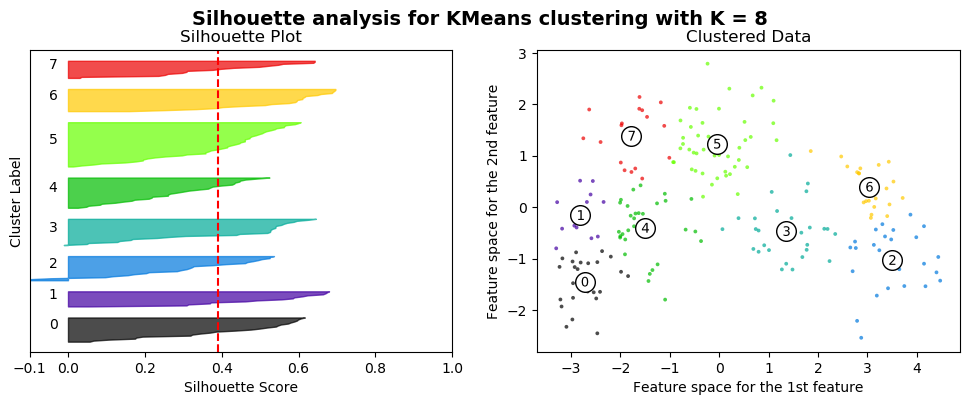

For K = 9, the average silhouette score is 0.388


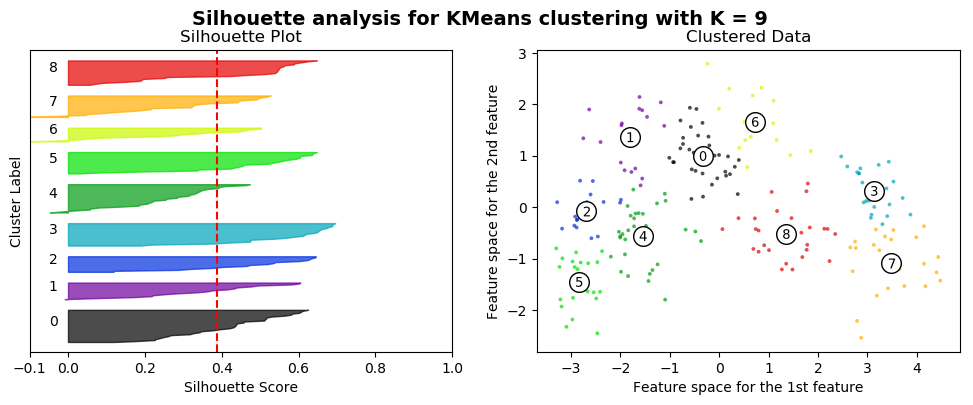

For K = 10, the average silhouette score is 0.381


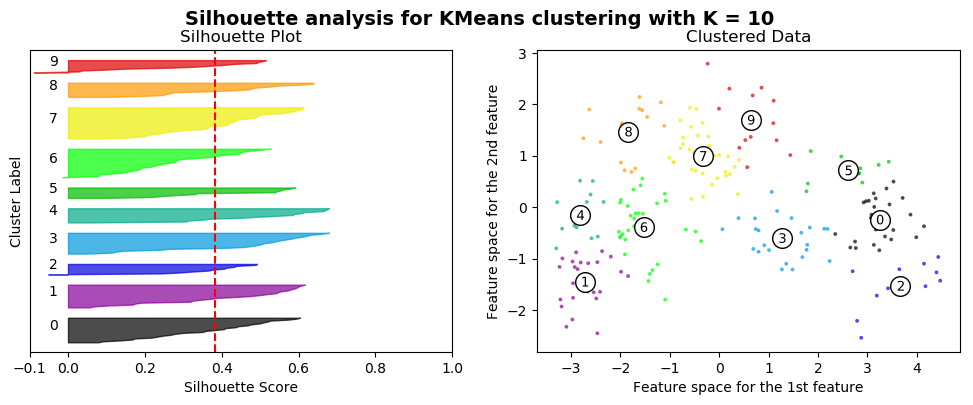

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for K in range(2,11):
    
    # Cluster using Kmeans
    kmeans = KMeans(init='random', n_clusters=K)
    y = kmeans.fit_predict(X)

    # Create side-by-side plots
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # ------------------------------------------
    # The left subplot is the silhouette plot
    # ------------------------------------------

    ax1.set_xlim([-0.1, 1.0])
    vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
    ax1.set_ylim([0, len(X) + vertical_spacing])

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, y)
    print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

    # Compute the silhouette scores for each instance/sample/object
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = 10
    for i in range(K):
        # Aggregate and sort the silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[y==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color setup
        color = cm.nipy_spectral(float(i) / K)

        # Fill the area between two curves
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # ------------------------------------------
    # The right plot shows the actual clusters formed
    # ------------------------------------------

    colors = cm.nipy_spectral(y.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Mark the cluster centers
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    # Label the cluster centers
    for i, c in enumerate(centers):
        cl = '${}$'.format(i)
        ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

    ax2.set_title("Clustered Data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering with K = {}".format(K),
                 fontsize=14, fontweight='bold')
    plt.show()

### Hierarchical

#### Cohesion and Separation

#### For hierarchical method, we still initialized it with different number of clusters, and calculated their corresponding SSE and SSB. 

SSE is 524.8316480397114
SSB is 783.2108988785023


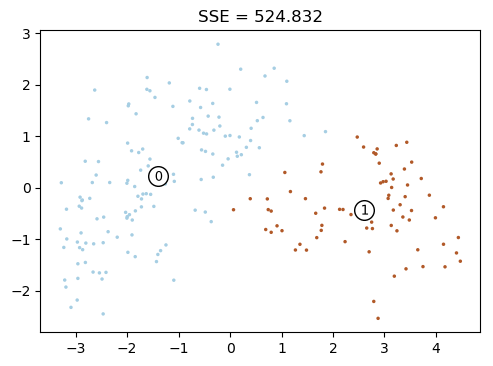

SSE is 284.93716033670506
SSB is 1023.1053865815092


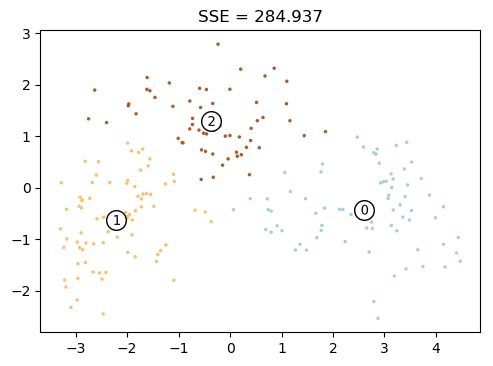

SSE is 224.98943396572204
SSB is 1083.0531129524925


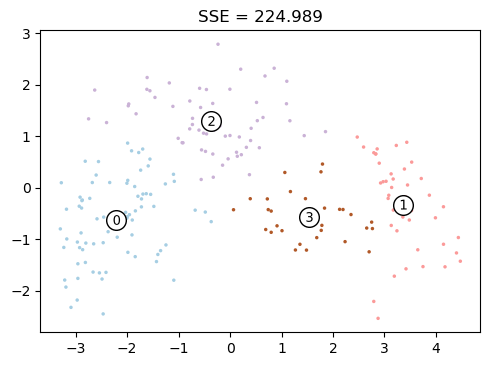

SSE is 189.63534119088646
SSB is 1118.407205727328


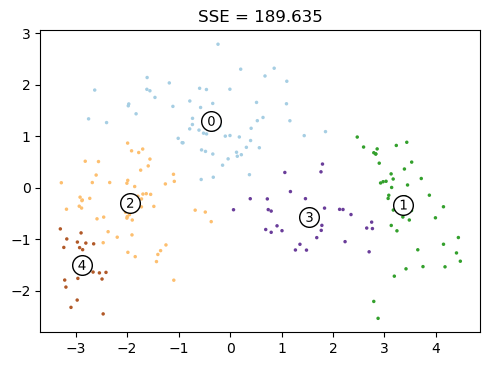

SSE is 154.8456244919673
SSB is 1153.196922426247


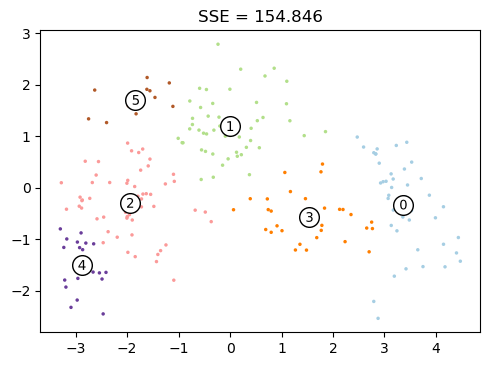

SSE is 130.3551807406892
SSB is 1177.6873661775248


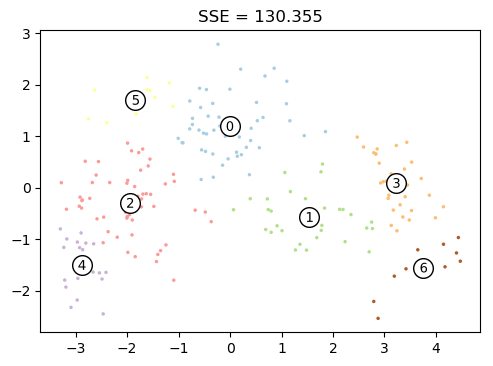

SSE is 114.16541233820865
SSB is 1193.8771345800055


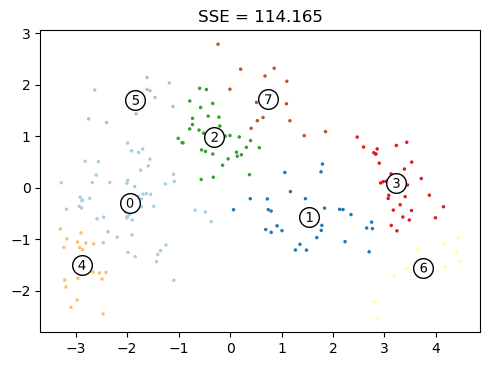

SSE is 99.76631082231032
SSB is 1208.2762360959039


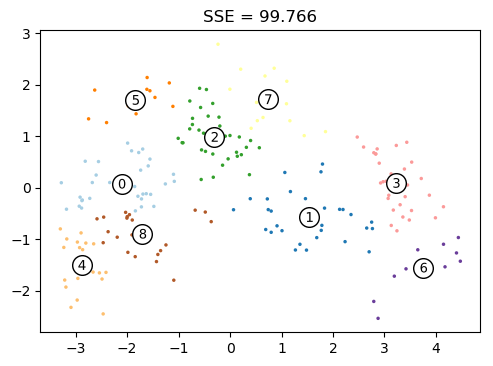

SSE is 88.78253095808701
SSB is 1219.260015960127


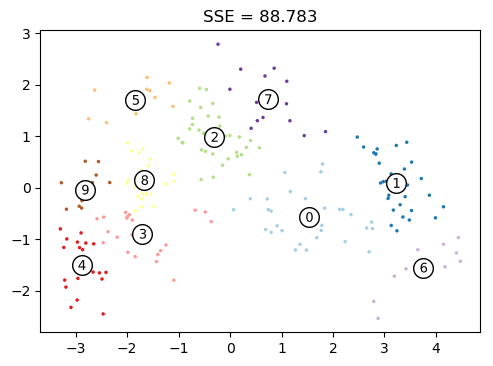

In [11]:
from sklearn.cluster import AgglomerativeClustering
SSE_Set = []
C_Set = []
y_Set = []
for n in range(2,11):
    SSE = 0
    SSB = 0
    Size_Set = []
    Class_Center = []
    for i in range(0,n):
        Size_Set.append(0)
        Class_Center.append([0,0])

    ac = AgglomerativeClustering(n_clusters=n)
    y = ac.fit_predict(X)
    y_Set.append(y)
    
    j = 0
    for x in X:
        for i in range(0,n+1):
            if y[j] == i:
                Class_Center[i][0] = Class_Center[i][0]+x[0]
                Class_Center[i][1] = Class_Center[i][1]+x[1]
        j+=1
    for p in ac.labels_:
        for cls in range(0,n+1):
            if p == cls:
                Size_Set[cls]+=1
    for i in range(0,n):
        Class_Center[i][0] = Class_Center[i][0]/Size_Set[i]
        Class_Center[i][1] = Class_Center[i][1]/Size_Set[i]
    k=0
    for x in X:
        for i in range(0,n+1):
            if y[k]==i:
                SSE += np.square(Class_Center[i][0]-x[0]) + np.square(Class_Center[i][1]-x[1])
        k += 1
    SSE_Set.append(SSE)
    
    # Plot 'em
    fig = plt.figure(figsize=(8, 4), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y, cmap='Paired')
    #ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
    ax.set_title('SSE = {:.3f}'.format(SSE))
    # Draw white circles at cluster centers
    for m in range(0,n):
        cl = '${}$'.format(m)
        ax.scatter(Class_Center[m][0], Class_Center[m][1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        ax.scatter(Class_Center[m][0], Class_Center[m][1], marker=cl, alpha=1, s=50, c='k', edgecolor='')
        SSB += Size_Set[m]*np.square(Class_Center[m][0]-cx) + Size_Set[m]*np.square(Class_Center[m][1]-cy)
    C_Set.append(Class_Center)
    print('SSE is',SSE)
    print('SSB is',SSB)
    plt.show()

#### Elbow Method

#### To choose the best value of k, elbow method is implemented to find a balance between SSE and k. Here, we choose k as 3.

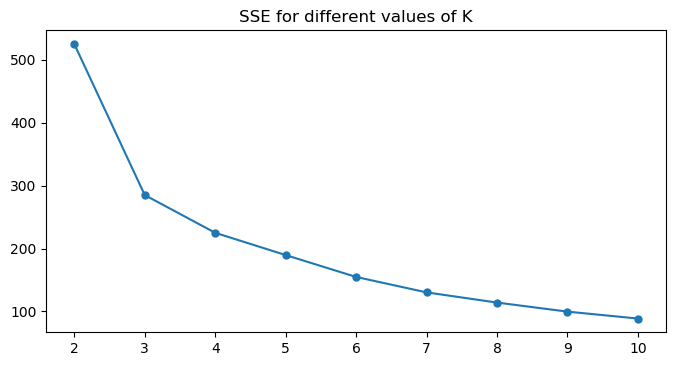

In [12]:
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(list(range(2,11)), SSE_Set, marker='.', markersize=10)
ax.set_title('SSE for different values of K')
plt.show()

#### Silhouette Score

#### From Silhouette Score method, we note that when k=3, the shape is more flatter. In addition, we can note that the negative value in Silhouette score for hierarchical method is more obvious comparing to K-means.

For K = 2, the average silhouette score is 0.518


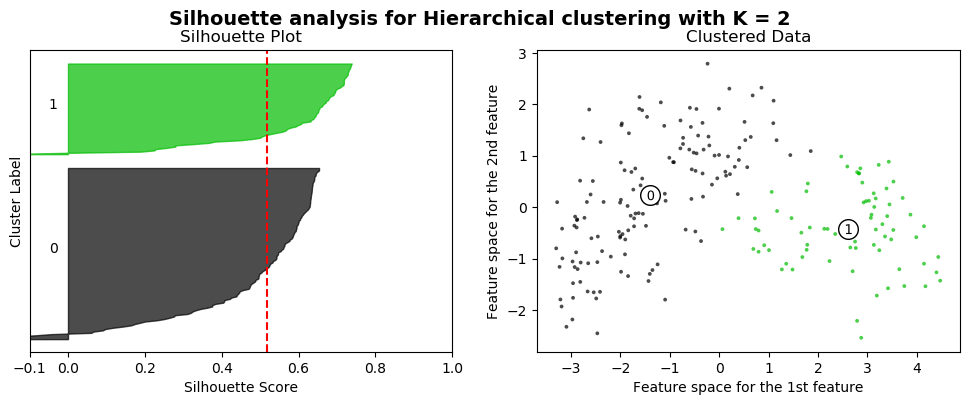

For K = 3, the average silhouette score is 0.491


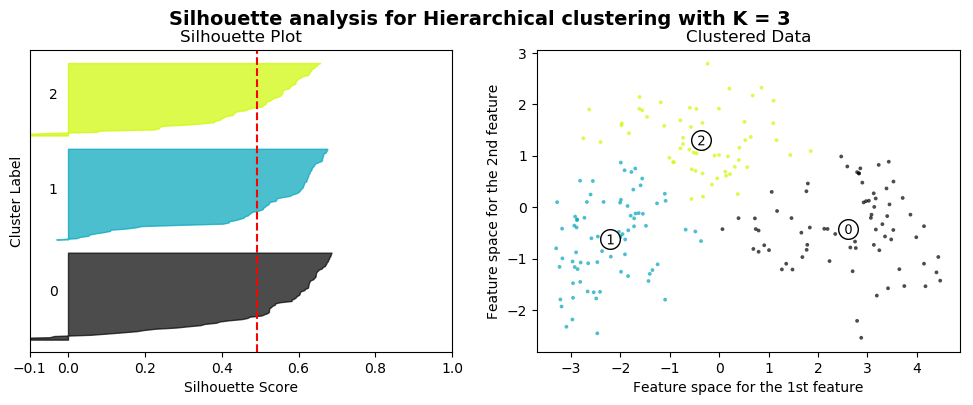

For K = 4, the average silhouette score is 0.441


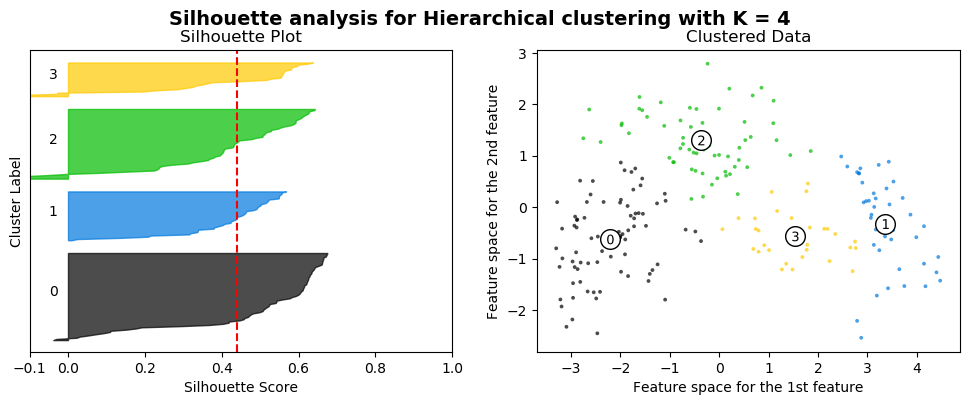

For K = 5, the average silhouette score is 0.371


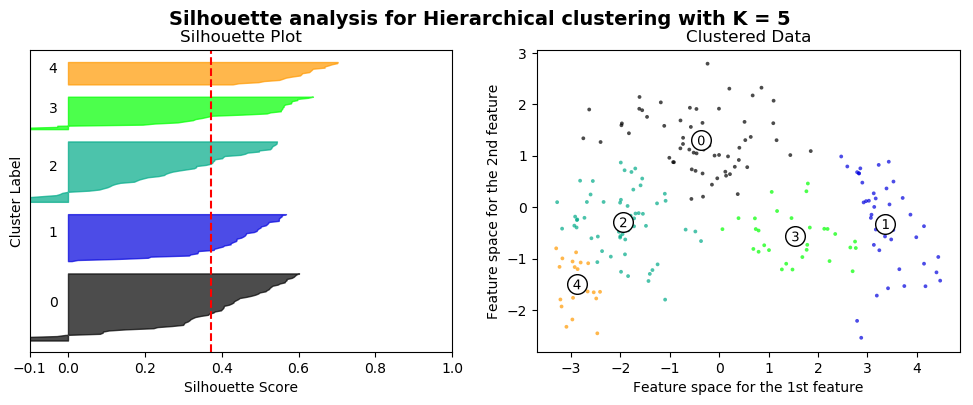

For K = 6, the average silhouette score is 0.369


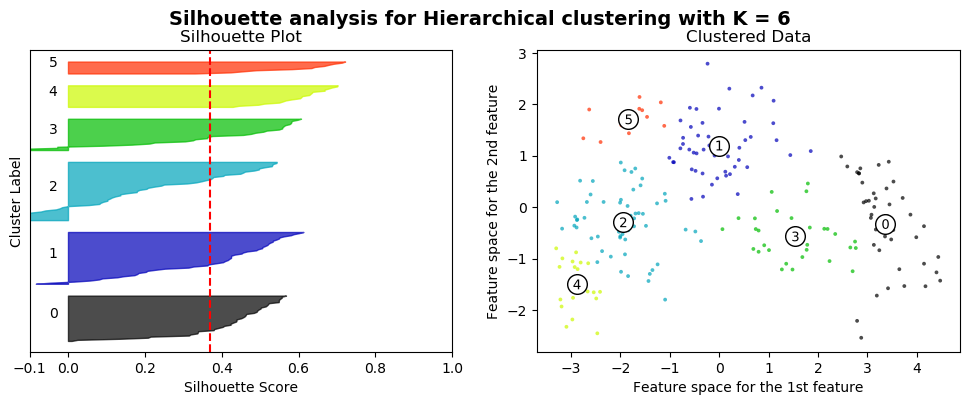

For K = 7, the average silhouette score is 0.378


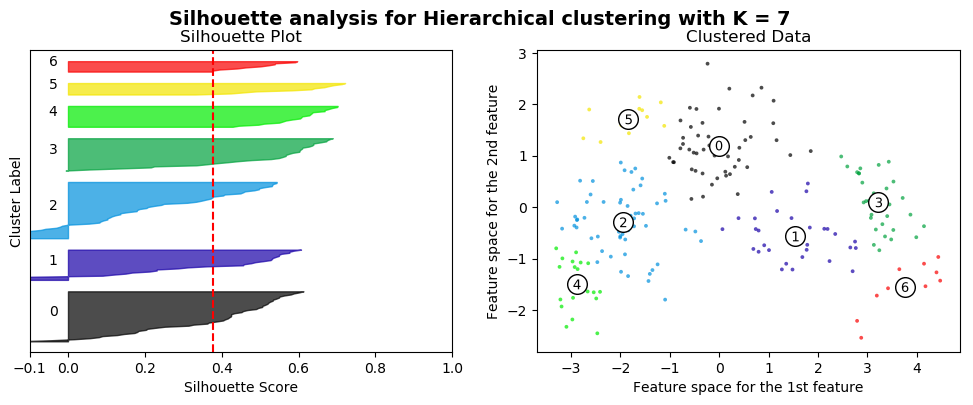

For K = 8, the average silhouette score is 0.373


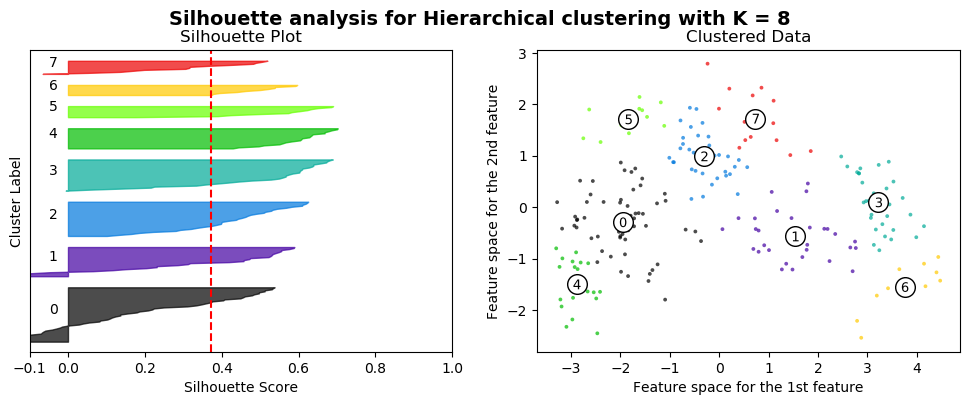

For K = 9, the average silhouette score is 0.376


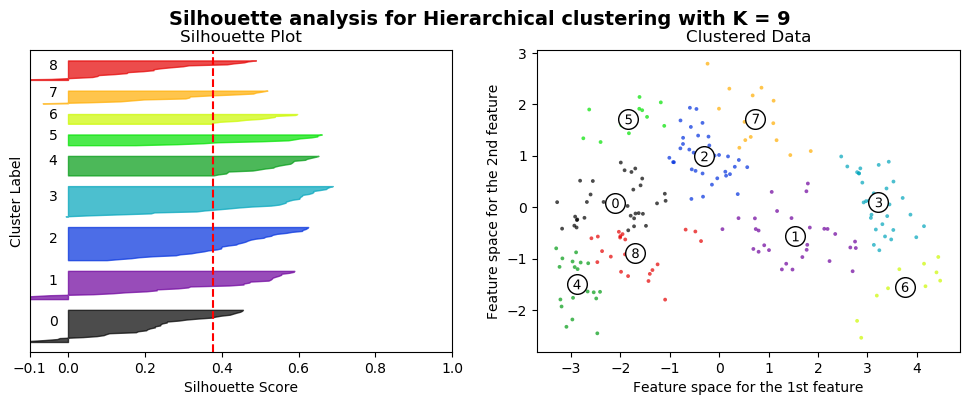

For K = 10, the average silhouette score is 0.397


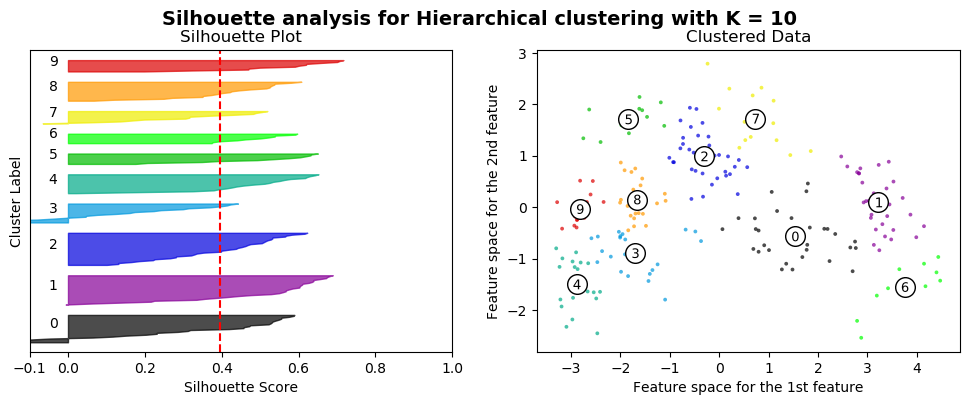

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for K in range(2,11):
    
    # Cluster using Kmeans
    y = y_Set[K-2]
    # Create side-by-side plots
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # ------------------------------------------
    # The left subplot is the silhouette plot
    # ------------------------------------------

    ax1.set_xlim([-0.1, 1.0])
    vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
    ax1.set_ylim([0, len(X) + vertical_spacing])

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, y)
    print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

    # Compute the silhouette scores for each instance/sample/object
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = 10
    for i in range(K):
        # Aggregate and sort the silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[y==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color setup
        color = cm.nipy_spectral(float(i) / K)

        # Fill the area between two curves
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # ------------------------------------------
    # The right plot shows the actual clusters formed
    # ------------------------------------------

    colors = cm.nipy_spectral(y.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Mark the cluster centers
    for m in range(K):
        ax2.scatter(C_Set[K-2][m][0], C_Set[K-2][m][1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

        # Draw white circles at cluster centers
        ax2.scatter(C_Set[K-2][m][0], C_Set[K-2][m][1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    # Label the cluster centers
    for m in range(K):
        cl = '${}$'.format(m)
        ax2.scatter(C_Set[K-2][m][0], C_Set[K-2][m][1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

    ax2.set_title("Clustered Data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for Hierarchical clustering with K = {}".format(K),
                 fontsize=14, fontweight='bold')
    plt.show()

### DBSCAN

#### Determine Eps and MinPts

#### First of all, we use NearestNeighbors method to find the best eps value for DBSCAN (supposing we use 3 as the number of minpts).

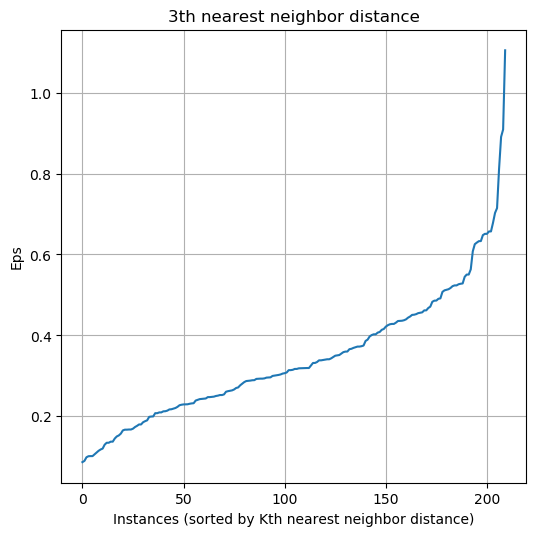

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap

nbrs = NearestNeighbors(n_neighbors=4).fit(X)
distances, indices = nbrs.kneighbors(X)

# Get the indexes of the array sorted by the 4th nearest neighbor
sorted_ix = distances[:,3].argsort()


# Extract the plot y values
py = distances[sorted_ix,3]
px = list(range(len(distances)))

fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(px, py) #, marker='.', s=25, edgecolor='k')
ax.set_title('3th nearest neighbor distance')
ax.set_xlabel('Instances (sorted by Kth nearest neighbor distance)')
ax.set_ylabel('Eps')
ax.grid()
plt.show()

We obtained 6 clusters.


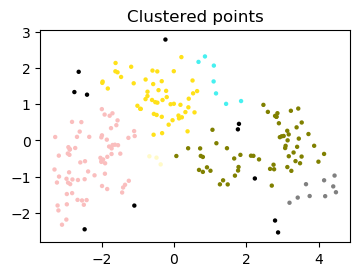

In [11]:
mycmap = ListedColormap([
    '#000000', '#e6194b', '#3cb44b', '#ffe119', 
    '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
    '#f032e6', '#bcf60c', '#fabebe', '#008080', 
    '#e6beff', '#9a6324', '#fffac8', '#800000', 
    '#aaffc3', '#808000', '#ffd8b1', '#000075', 
    '#808080'
], name='mhb1', N=None)
# Create DBSCAN object using our hyperparameters
dbest = DBSCAN(eps=0.46, min_samples=3)
1
# Perform the clustering and get back the cluster labels
y = dbest.fit_predict(X)
print("We obtained {} clusters.".format(max(y)+1))
n = max(y)
# Make pretty plot
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=10, edgecolor='None', cmap=mycmap)
ax.set_title('Clustered points')
plt.show()

In [12]:
pd.Series(y).value_counts().sort_index()

-1    11
 0    50
 1     7
 2    71
 3     3
 4    59
 5     9
dtype: int64

#### We obtained 6 clusters, the index -1 represents the noise.

#### Cohesion and Separation

In [28]:
X_ = 0
Y_ = 0
size = 0
for d in X:
    X_ = X_ + d[0]
    Y_ = Y_ + d[1]
    size += 1 
cx = X_/size
cy = Y_/size

SSE is 194.29337902011665
SSB is 1021.9772478677924


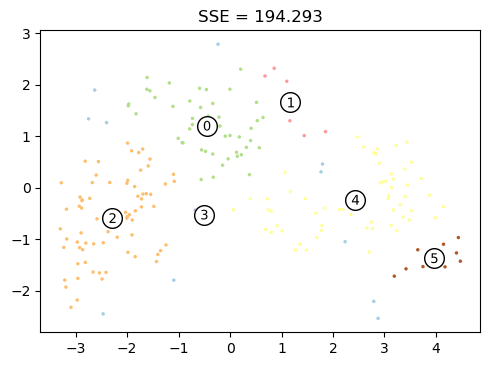

In [29]:
SSE = 0
SSB = 0
Size_Set = []
Class_Center = []
for i in range(0,n+1):
    Size_Set.append(0)
    Class_Center.append([0,0])
j = 0
for x in X:
    for i in range(0,n+1):
        if y[j] == i:
            Class_Center[i][0] = Class_Center[i][0]+x[0]
            Class_Center[i][1] = Class_Center[i][1]+x[1]
    j+=1
    
for p in dbest.labels_:
    for cls in range(0,n+1):
        if p == cls:
            Size_Set[cls]+=1         
for i in range(0,n+1):
    Class_Center[i][0] = Class_Center[i][0]/Size_Set[i]
    Class_Center[i][1] = Class_Center[i][1]/Size_Set[i]
k=0
for x in X:
    for i in range(0,n+1):
        if y[k]==i:
            SSE += np.square(Class_Center[i][0]-x[0]) + np.square(Class_Center[i][1]-x[1])
    k += 1

# Plot 'em
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y, cmap='Paired')
#ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
ax.set_title('SSE = {:.3f}'.format(SSE))
# Draw white circles at cluster centers
for m in range(0,n+1):
    cl = '${}$'.format(m)
    ax.scatter(Class_Center[m][0], Class_Center[m][1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    ax.scatter(Class_Center[m][0], Class_Center[m][1], marker=cl, alpha=1, s=50, c='k', edgecolor='')
    SSB += Size_Set[m]*np.square(Class_Center[m][0]-cx) + Size_Set[m]*np.square(Class_Center[m][1]-cy)
print('SSE is',SSE)
print('SSB is',SSB)

#### Silhouette Score

#### Here we also use Sihouette Score to evaluate the method. When k=6, the average silhouette score is 0.212, and the shape is not so flat as the above two methods'.

For K = 6, the average silhouette score is 0.212


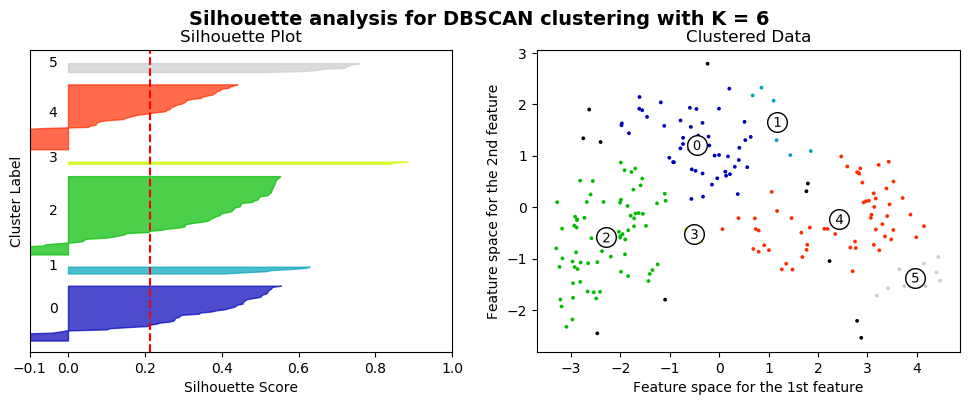

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline
fig = plt.figure(figsize=(12, 4), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_xlim([-0.1, 1.0])
vertical_spacing = (n+1)*10 # extra spacing to separate the silhouettes
ax1.set_ylim([0, len(X) + vertical_spacing])
# The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, y)
K = n+1
print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

# Compute the silhouette scores for each instance/sample/object
sample_silhouette_values = silhouette_samples(X, y)
y_lower = 10
for i in range(K):
    # Aggregate and sort the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[y==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # color setup
    color = cm.nipy_spectral((float(i)+1) / K)

    # Fill the area between two curves
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("Silhouette Plot")
ax1.set_xlabel("Silhouette Score")
ax1.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral((y.astype(float)+1) / K)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=1, c=colors, edgecolor='', cmap='Paired')

# Mark the cluster centers
for m in range(K):
    ax2.scatter(Class_Center[m][0], Class_Center[m][1], marker='+', c="black", alpha=1, s=200)

    # Draw white circles at cluster centers
    ax2.scatter(Class_Center[m][0], Class_Center[m][1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
# Label the cluster centers
for m in range(K):
    cl = '${}$'.format(m)
    ax2.scatter(Class_Center[m][0], Class_Center[m][1], marker=cl, alpha=1, s=50, c='k', edgecolor='')
    ax2.set_title("Clustered Data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for DBSCAN clustering with K = {}".format(K),
                 fontsize=14, fontweight='bold')

#### Cluster Validity using Correlation

In [19]:
# Get indices of sorted class labels
y_order = y.argsort()

# Calculate incidence matrix
# 1 if point i and point j are in the same cluster, 0 otherwise
incd_mx = []
for i in y_order:
    row = []
    for j in y_order:
        if y[i] == y[j]:
            row.append(1)
        else:
            row.append(0)
    incd_mx.append(row)
incd_mx = np.array(incd_mx)

# Calculate distance matrix in y_order
dist_mx = []
for i in y_order:
    row = []
    for j in y_order:
        row.append(euclidean(X[i], X[j]))
    dist_mx.append(row)
dist_mx = np.array(dist_mx)

def myfunc(x):
    dmin = dist_mx.min()
    dmax = dist_mx.max()
    return(1-((x-dmin)/(dmax-dmin)))

sim_mx = myfunc(dist_mx)

corr, pvalue = pearsonr(np.array(sim_mx).reshape(-1,1), np.array(incd_mx).reshape(-1,1))
print(corr)
print(pvalue)

[0.60247707]
[0.]


### From the above three clustering estimators, we can find the best estimator is K-means. Even though it has randomness, it can get smaller SSE when k=3. In addition, it can get a flatter Sihouette without a negative value. In contrast, DBSCAN perform worst. When dealing with not  densed data, the estimator can not get good clustering results.

## 4. Exceptional work (10 points) 

### Assume K=3 and try to find an optimal clustering using any or all of the three techniques (Kmeans, hierarchical, and DBSCAN). Evaluate your results in terms of accuracy with respect to the “Variety” attribute. 

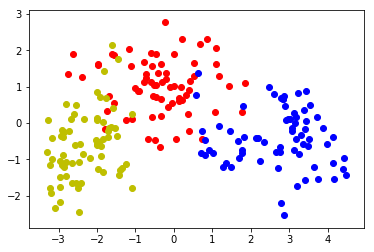

In [20]:
label = df0.loc[:,['variety']]
label = label.values.reshape(-1,1)
z = 0
for x in X:
    if label[z]==1:
        color = 'r'
    if label[z]==2:
        color = 'b'
    if label[z]==3:
        color = 'y'
    plt.scatter(x[0],x[1],c=color)
    z+=1

def accu(q):
    clas = 0

    c1 = []
    c2 = []
    c3 = []

    index = 0
    for x in X:
        if(label[index]==1):
            c1.append(index)
        if(label[index]==2):
            c2.append(index)
        if(label[index]==3):
            c3.append(index)
        index += 1

    same1 = 0
    same2 = 0
    same3 = 0
    clas = 0
    for c in c1:
        if q[c]==0:
            same1 += 1
        if q[c]==1:
            same2 += 1
        if q[c]==2:
            same3 += 1
    clas = max(same1,same2,same3)
    same1 = 0
    same2 = 0
    same3 = 0
    for c in c2:
        if q[c]==0:
            same1 += 1
        if q[c]==1:
            same2 += 1
        if q[c]==2:
            same3 += 1
    clas += max(same1,same2,same3)
    same1 = 0
    same2 = 0
    same3 = 0        
    for c in c3:
        if q[c]==0:
            same1 += 1
        if q[c]==1:
            same2 += 1
        if q[c]==2:
            same3 += 1
    clas += max(same1,same2,same3)
    accuracy = clas/(z+1)
    print(accuracy)

0.919431279620853


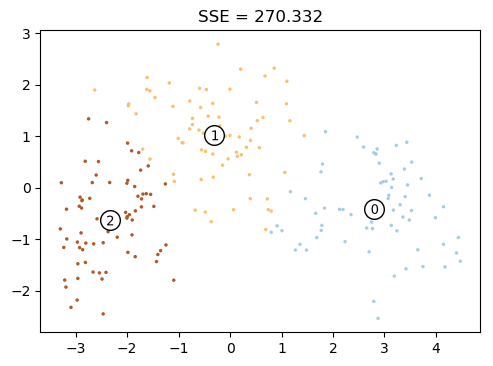

0.9052132701421801


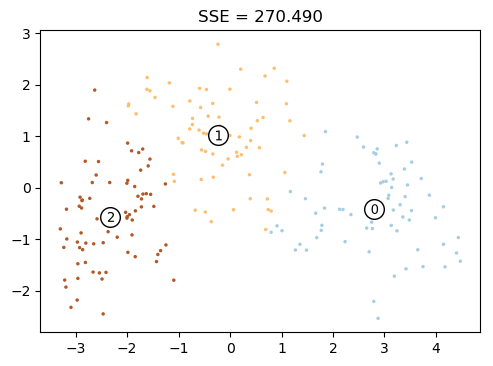

0.9052132701421801


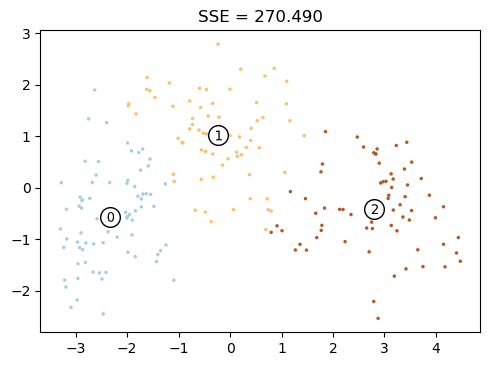

0.919431279620853


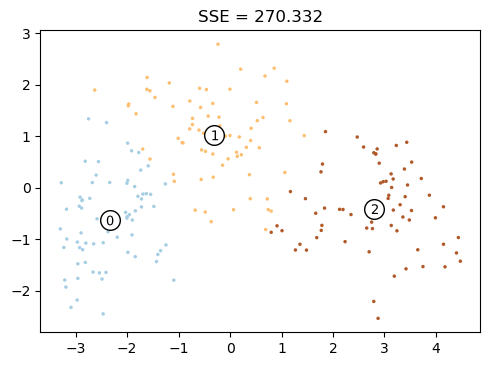

0.919431279620853


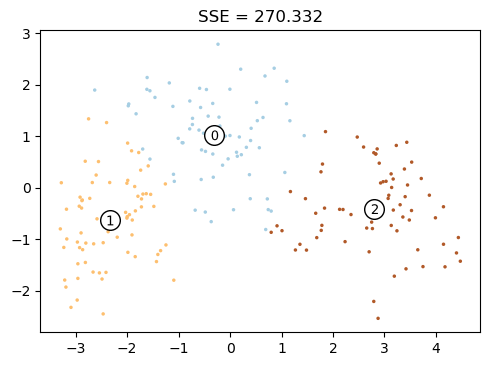

In [22]:
for n in range(5):
    kmeans = KMeans(init='random', n_clusters=3)
    y = kmeans.fit_predict(X)
    SSE = kmeans.inertia_
    centers = kmeans.cluster_centers_
    accu(y)
    
    # Plot 'em
    fig = plt.figure(figsize=(8, 4), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y, cmap='Paired')
    #ax.scatter(centers[:,0], centers[:,1], marker='x', s=50, edgecolor='', c='red', linewidths=0)
    ax.set_title('SSE = {:.3f}'.format(kmeans.inertia_))
    
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    # Label the cluster centers
    for i, c in enumerate(centers):
        cl = '${}$'.format(i)
        ax.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')
    plt.show()

#### According to the accuracy and SSE of these 5 clustering using Kmeans, I think the 1st model generated the optimal clustering. Because it has the highest accuracy and the lowest SSE among these 5 models. Thus, the clustering can have the best cohesion and separation and understand the data well.